In [3]:
import numpy as np
from math import exp
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
import seaborn as sns

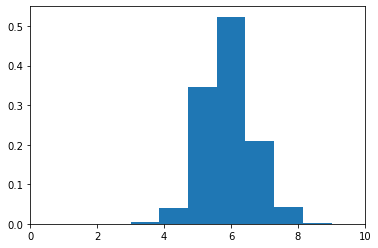

In [73]:
import matplotlib.pyplot as plt
df = pd.read_csv('whitewine.csv', delimiter=';')
quality_data = df['quality'].to_numpy()
n, bins, patches = plt.hist(quality_data, 7, density=True)
plt.xlim(0, 10)
plt.show()


<AxesSubplot:>

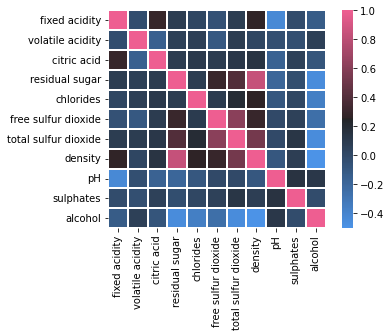

In [74]:
corr = df.iloc[:,:-1].corr(method='pearson')

cmap = sns.diverging_palette(250,354,80,60,center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)

In [75]:
def calculate_p_y(df):
    quality_list = list(range(0,11))
    p_quality = []
    row_count = len(df)
    for quality in quality_list:
        if quality in (0,1,2,10):
            p_quality.append(0)
        else:
            p_quality.append(len(df[df['quality'] == quality])/row_count)
    return p_quality

In [14]:

def calculate_p_attr_y(attr_value, mean, var):
    p_attr_y = exp((-(attr_value - mean)**2)/(2*var))/(np.sqrt(2*np.pi*var))
    return p_attr_y

In [17]:
def naive_bayes_classifier(df, test_samples):
    attributes = list(df.columns)[:-1]
    p_quality = calculate_p_y(df)
    quality_pred = []
    quality_list = list(range(0,11))
    df_mean = train_df.groupby(['quality']).mean()
    df_var = train_df.groupby(['quality']).var()
    for sample in test_samples:
        p_attr_y_list = [1]*11
        for quality in quality_list:
            for attr in range(len(attributes)):
                if quality in (0,1,2,10):
                    p_attr_y_list[quality] = 0
                else:
                    p_attr_y_list[quality] *= calculate_p_attr_y(sample[attr], df_mean.loc[quality][attributes[attr]], df_var.loc[quality][attributes[attr]])
        post_prob = [1]*11
        for quality in quality_list:
            post_prob[quality] = p_attr_y_list[quality] * p_quality[quality]
        quality_pred.append(np.argmax(post_prob))
    return np.array(quality_pred)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
df = pd.read_csv('whitewine.csv', delimiter=';')
df = df.drop(columns='density')
train_df, test_df = train_test_split(df, test_size=0.4, random_state=1)
X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:, -1].values
Y_pred = naive_bayes_classifier(train_df, X_test)
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='micro'))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != Y_pred).sum()))

[[  1   0   1   2   0   0   0]
 [  0  12  11  26   6   0   0]
 [  3  23 260 273  46   1   0]
 [  4  17 168 405 256   2   1]
 [  0   0  19 107 243   1   3]
 [  0   1   1  16  46   4   0]
 [  0   0   0   1   0   0   0]]
0.4719387755102041
Number of mislabeled points out of a total 1960 points : 1035


In [79]:
from sklearn.metrics import confusion_matrix, f1_score
k = 5
df = pd.read_csv('whitewine.csv', delimiter=';')
df = df.drop(columns='density')
df = df.sample(frac=1, random_state=2)
split_dfs = np.array_split(df, k)
scores=[]
for i in range(0, k):
    frames = split_dfs[0:i] + split_dfs[i + 1::]
    train_df = pd.concat(frames)
    test_df = split_dfs[i]
    X_test = test_df.iloc[:,:-1].values
    Y_test = test_df.iloc[:, -1].values
    Y_pred = naive_bayes_classifier(train_df, X_test)
    score = f1_score(Y_test, Y_pred, average='micro')
    scores.append(score)
print(scores)
print(sum(scores)/k)


[0.4418367346938776, 0.4602040816326531, 0.45, 0.4586312563840654, 0.4606741573033708]
0.4542692460027934


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
from math import exp
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv('whitewine.csv', delimiter=';')
train_df, test_df = train_test_split(df, test_size=0.4, random_state=1)
X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:, -1].values
X_train = train_df.iloc[:,:-1].values
Y_train = train_df.iloc[:, -1].values
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='micro'))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != Y_pred).sum()))

[[  1   0   1   2   0   0   0]
 [  0  13  16  20   6   0   0]
 [  3  25 306 217  54   1   0]
 [  4  16 209 341 278   3   2]
 [  0   0  34  83 248   2   6]
 [  0   0   5  12  45   5   1]
 [  0   0   0   1   0   0   0]]
0.4663265306122449
Number of mislabeled points out of a total 1960 points : 1046
